# Ham or Spam - Gerçek Mesaj veya Reklam/ İstenmeyen Mesaj

In [1]:
#!pip install wordcloud

In [2]:
# Word Cloud eg:

<a href="https://media.istockphoto.com/id/1366451494/tr/vekt%C3%B6r/teamwork-word-cloud-template-business-concept-vector-background.jpg?s=612x612&w=0&k=20&c=6Y27BNCE-2dgLLtbbxj6uX_aqPI_T7_rsAQ1tKWpnPQ=" target="_blank">
        <img src="https://media.istockphoto.com/id/1366451494/tr/vekt%C3%B6r/teamwork-word-cloud-template-business-concept-vector-background.jpg?s=612x612&w=0&k=20&c=6Y27BNCE-2dgLLtbbxj6uX_aqPI_T7_rsAQ1tKWpnPQ=" alt="Teamwork Word Cloud" width="612" height="612">

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("spam.csv", encoding = 'latin-1')
# encoding = 'latin-1' is necessary, otherwise it is not working

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df.head()
# or
#df = df[['v1', 'v2']]

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# v1  and v2 is not names that are appropriate. Thus, we are goint to change them

In [9]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [10]:
df.columns = ['Class', 'Text']
# We said class because we are going to use classification
# Why?
# Because we are seeking for answer that is yes or no
# Thus, classification

In [11]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
import seaborn as sns

<Axes: xlabel='Class', ylabel='count'>

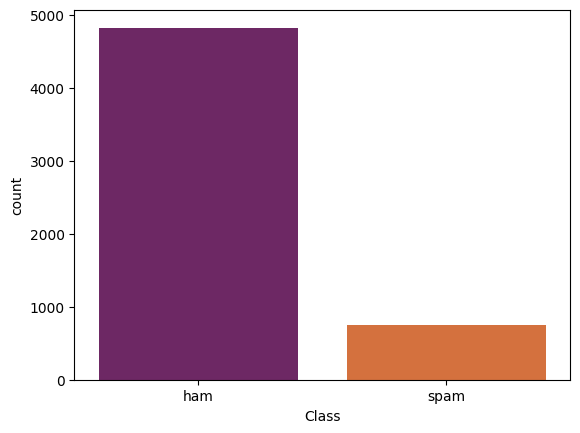

In [13]:
sns.countplot(x = df['Class'], palette = 'inferno')

In [14]:
df['Class'].value_counts()

Class
ham     4825
spam     747
Name: count, dtype: int64

In [15]:
dict = {'ham':0, 'spam':1}

In [16]:
df['Class'] = df['Class'].map(dict)
# map is the modern way of for loop

In [17]:
df['Text'] = df['Text'].str.lower()
df['Text'] = df['Text'].str.replace('[^a-zA-Z\\s]','',regex=True)
df['Text'] = df['Text'].str.replace('\n','')
df['Text'] = df['Text'].str.replace('\r', '')

In [18]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np

In [19]:
# DRY - Don't Repeat Yourself.

In [20]:
import matplotlib.pyplot as plt

In [21]:
def wc(data, bgcolor):
    plt.figure(figsize = (10, 10))
    mask = np.array(Image.open('mask.jpg'))
    wc = WordCloud(background_color = bgcolor, stopwords = STOPWORDS, mask = mask)
    wc.generate(' '.join(data))  # Tum kelimeleri birlestiriyor ve tek bir paragraf haline geliyor
    plt.imshow(wc)
    plt.axis('off')

In [22]:
ham = df[df['Class'] == 0]['Text']
spam = df[df['Class'] == 1]['Text']

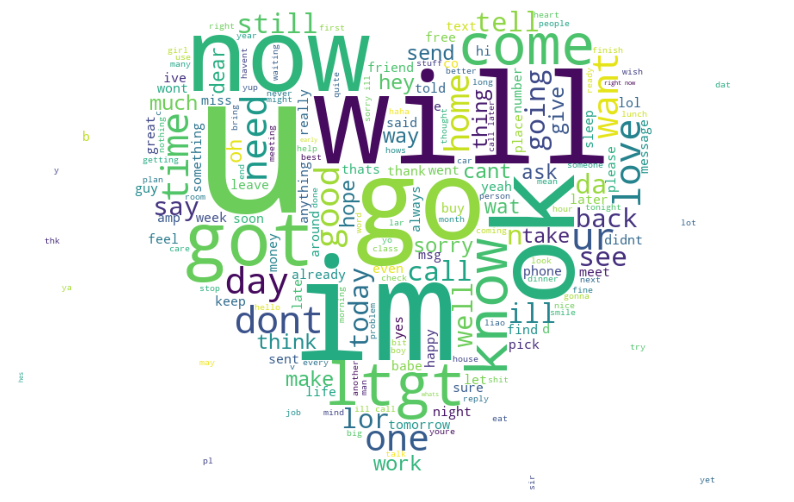

In [23]:
wc(ham, 'white')

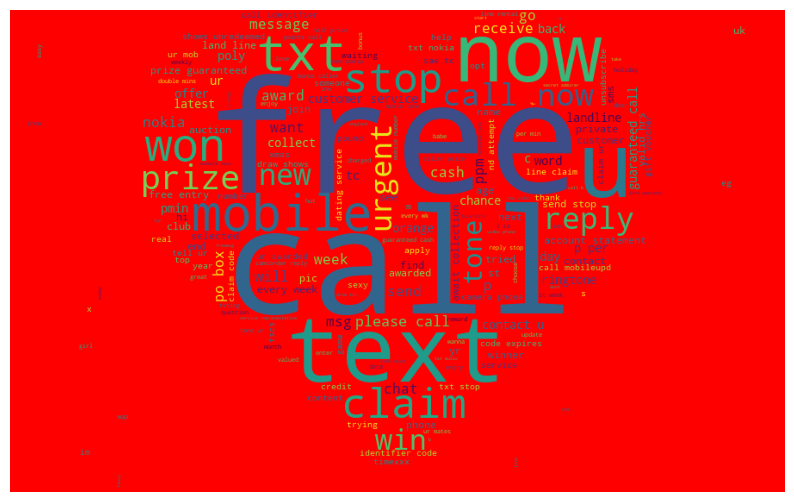

In [24]:
wc(spam, 'red')

In [25]:
x = df['Text']
y = df['Class']

In [26]:
# Yeni mesaj geldiginde otomatik egitim yapan kısım

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = .2)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr = PorterStemmer()

In [31]:
def lemmafn(text):
    words = TextBlob(text).words
    return [pr.stem(word) for word in words]

In [32]:
# Ekleri kaldırıp kökleri buluyor
vect = CountVectorizer(stop_words = 'english', ngram_range = (1, 2), analyzer = lemmafn)

In [33]:
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)

In [34]:
nb = MultinomialNB()

In [35]:
model = nb.fit(x_train, y_train)

In [36]:
guess = model.predict(x_test)

In [38]:
accuracy_score(y_test, guess)

0.9811659192825112